# Import

In [1]:
# this library is used for drawing the charts easily.
# use this library to draw your charts in this homework.
!pip install -q git+https://github.com/MJAHMADEE/docs

  Preparing metadata (setup.py) ... done


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
from keras import backend as K
from keras.layers import Dense
from keras.models import Model

# 1.Prepare data

In [12]:
# unzip data and load them
from google.colab import drive

drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [13]:
! unzip "/content/drive/My Drive/DeepLearning/HW5/time-series.zip" 

Archive:  /content/drive/My Drive/DeepLearning/HW5/time-series.zip
  inflating: 4.csv                   
  inflating: 5.csv                   
  inflating: 6.csv                   
  inflating: 7.csv                   
  inflating: 8.csv                   
  inflating: 9.csv                   
  inflating: 10.csv                  
  inflating: 11.csv                  
  inflating: 12.csv                  
  inflating: 13.csv                  
  inflating: 14.csv                  
  inflating: 15.csv                  
  inflating: 16.csv                  
  inflating: 17.csv                  
  inflating: 18.csv                  
  inflating: 19.csv                  
  inflating: 20.csv                  
  inflating: 21.csv                  
  inflating: 22.csv                  
  inflating: 23.csv                  
  inflating: 24.csv                  
  inflating: 25.csv                  
  inflating: 26.csv                  
  inflating: 27.csv                  
  inflating: 28.csv  

In [14]:
import os

datasets = []
for sample_file in os.listdir():
  if sample_file.endswith(".csv"):
    datasets.append(pd.read_csv(sample_file))

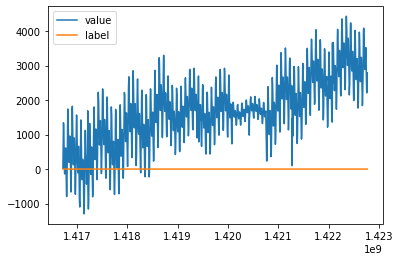

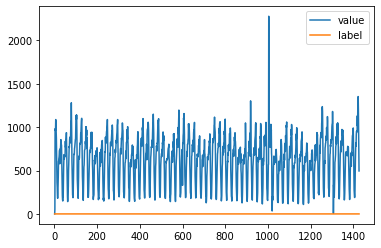

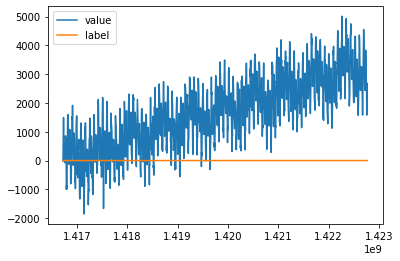

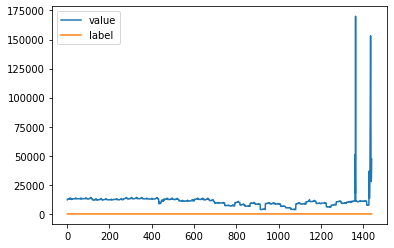

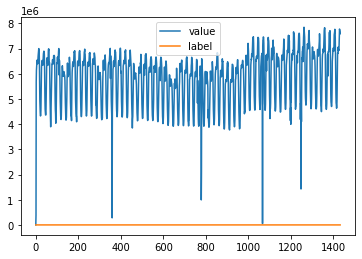

<Figure size 432x288 with 0 Axes>

In [16]:
# show chart of 5 dataset(csv file) randomly
rands = [1, 17, 32, 63, 76]

for idx in rands:
  plt.plot(datasets[idx]["timestamp"], datasets[idx]["value"], label="value")
  plt.plot(datasets[idx]["timestamp"], datasets[idx]["label"], label="label")
  plt.legend()
  plt.figure()


In [19]:
# split data to train and test
df = pd.concat(datasets, ignore_index=True)
x = df["value"]
x = x.values.reshape(-1, 1, 1)
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Metric functions

In [20]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + 
    K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# 3. Create and train 3 RNN model(Simple, LSTM, GRU)

In [21]:
# Simple
model = keras.Sequential()
model.add(layers.SimpleRNN(64, input_shape=(1, 1)))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=(f1_score_m))
model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=keras.callbacks.EarlyStopping(monitor='val_f1_score_m',
                                            patience=5,
                                            restore_best_weights=True))

Epoch 1/10
17737/17737 [==============================] - 99s 5ms/step - loss: 0.0792 - f1_score_m: 0.0407 - val_loss: 0.0771 - val_f1_score_m: 0.0878
Epoch 2/10
17737/17737 [==============================] - 92s 5ms/step - loss: 0.0774 - f1_score_m: 0.0869 - val_loss: 0.0772 - val_f1_score_m: 0.1086
Epoch 3/10
17737/17737 [==============================] - 91s 5ms/step - loss: 0.0771 - f1_score_m: 0.0896 - val_loss: 0.0765 - val_f1_score_m: 0.0995
Epoch 4/10
17737/17737 [==============================] - 93s 5ms/step - loss: 0.0769 - f1_score_m: 0.0933 - val_loss: 0.0768 - val_f1_score_m: 0.0748
Epoch 5/10
17737/17737 [==============================] - 91s 5ms/step - loss: 0.0766 - f1_score_m: 0.0904 - val_loss: 0.0766 - val_f1_score_m: 0.1157
Epoch 6/10
17737/17737 [==============================] - 93s 5ms/step - loss: 0.0762 - f1_score_m: 0.0937 - val_loss: 0.0762 - val_f1_score_m: 0.0862
Epoch 7/10
17737/17737 [==============================] - 90s 5ms/step - loss: 0.0757 - f1_sco

In [22]:
# LSTM
model = keras.Sequential()
model.add(layers.LSTM(64, input_shape=(1, 1)))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=(f1_score_m))
model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=keras.callbacks.EarlyStopping(monitor='val_f1_score_m',
                                            patience=5,
                                            restore_best_weights=True))

Epoch 1/10
17737/17737 [==============================] - 91s 5ms/step - loss: 0.0764 - f1_score_m: 0.0086 - val_loss: 0.0703 - val_f1_score_m: 0.1057
Epoch 2/10
17737/17737 [==============================] - 95s 5ms/step - loss: 0.0691 - f1_score_m: 0.0575 - val_loss: 0.0710 - val_f1_score_m: 0.0666
Epoch 3/10
17737/17737 [==============================] - 93s 5ms/step - loss: 0.0683 - f1_score_m: 0.0780 - val_loss: 0.0690 - val_f1_score_m: 5.0736e-04
Epoch 4/10
17737/17737 [==============================] - 87s 5ms/step - loss: 0.0679 - f1_score_m: 0.0837 - val_loss: 0.0686 - val_f1_score_m: 0.1041
Epoch 5/10
17737/17737 [==============================] - 84s 5ms/step - loss: 0.0677 - f1_score_m: 0.0886 - val_loss: 0.0674 - val_f1_score_m: 0.1023
Epoch 6/10
17737/17737 [==============================] - 86s 5ms/step - loss: 0.0674 - f1_score_m: 0.0885 - val_loss: 0.0677 - val_f1_score_m: 0.0955
Epoch 7/10
17737/17737 [==============================] - 93s 5ms/step - loss: 0.0672 - f1

In [23]:
# GRU
model = keras.Sequential()
model.add(layers.GRU(64, input_shape=(1, 1)))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=(f1_score_m))
model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=keras.callbacks.EarlyStopping(monitor='val_f1_score_m',
                                            patience=5,
                                            restore_best_weights=True))

Epoch 1/10
17737/17737 [==============================] - 95s 5ms/step - loss: 0.0794 - f1_score_m: 0.0255 - val_loss: 0.0761 - val_f1_score_m: 0.0667
Epoch 2/10
17737/17737 [==============================] - 92s 5ms/step - loss: 0.0754 - f1_score_m: 0.0842 - val_loss: 0.0747 - val_f1_score_m: 0.0892
Epoch 3/10
17737/17737 [==============================] - 91s 5ms/step - loss: 0.0748 - f1_score_m: 0.0928 - val_loss: 0.0744 - val_f1_score_m: 0.0893
Epoch 4/10
17737/17737 [==============================] - 85s 5ms/step - loss: 0.0744 - f1_score_m: 0.0943 - val_loss: 0.0742 - val_f1_score_m: 0.0890
Epoch 5/10
17737/17737 [==============================] - 90s 5ms/step - loss: 0.0742 - f1_score_m: 0.0957 - val_loss: 0.0739 - val_f1_score_m: 0.0997
Epoch 6/10
17737/17737 [==============================] - 84s 5ms/step - loss: 0.0739 - f1_score_m: 0.0962 - val_loss: 0.0739 - val_f1_score_m: 0.0868


# 4. Preprocces data to get better performance

In [24]:
# Preprocces method 1
minmax_scaler = MinMaxScaler()
x_train = minmax_scaler.fit_transform(x_train.reshape(-1,1)).reshape(-1,1,1)
x_test = minmax_scaler.transform(x_test.reshape(-1,1)).reshape(-1,1,1)

In [26]:
# Preprocces method 2 = StandardScaler
standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train.reshape(-1,1))
x_test = standard_scaler.transform(x_test.reshape(-1,1))

In [27]:
# Train 3 models again
# Simple
model = keras.Sequential()
model.add(layers.SimpleRNN(8, input_shape=(1, 1)))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=(f1_score_m))
model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=keras.callbacks.EarlyStopping(monitor='val_f1_score_m',
                                            patience=5,
                                            restore_best_weights=True))

Epoch 1/10
17737/17737 [==============================] - 95s 5ms/step - loss: 0.0961 - f1_score_m: 5.3695e-06 - val_loss: 0.0930 - val_f1_score_m: 0.0000e+00
Epoch 2/10
17737/17737 [==============================] - 82s 5ms/step - loss: 0.0932 - f1_score_m: 0.0000e+00 - val_loss: 0.0926 - val_f1_score_m: 0.0000e+00
Epoch 3/10
17737/17737 [==============================] - 84s 5ms/step - loss: 0.0927 - f1_score_m: 0.0000e+00 - val_loss: 0.0927 - val_f1_score_m: 0.0000e+00
Epoch 4/10
17737/17737 [==============================] - 90s 5ms/step - loss: 0.0921 - f1_score_m: 5.6379e-05 - val_loss: 0.0912 - val_f1_score_m: 0.0000e+00
Epoch 5/10
17737/17737 [==============================] - 86s 5ms/step - loss: 0.0917 - f1_score_m: 6.0138e-05 - val_loss: 0.0910 - val_f1_score_m: 0.0000e+00
Epoch 6/10
17737/17737 [==============================] - 92s 5ms/step - loss: 0.0916 - f1_score_m: 2.8190e-05 - val_loss: 0.0912 - val_f1_score_m: 0.0000e+00


In [28]:
# LSTM
model = keras.Sequential()
model.add(layers.LSTM(16, input_shape=(1, 1)))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=(f1_score_m))
model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=keras.callbacks.EarlyStopping(monitor='val_f1_score_m',
                                            patience=7,
                                            restore_best_weights=True))

Epoch 1/15
17737/17737 [==============================] - 100s 6ms/step - loss: 0.0967 - f1_score_m: 0.0000e+00 - val_loss: 0.0934 - val_f1_score_m: 0.0000e+00
Epoch 2/15
17737/17737 [==============================] - 86s 5ms/step - loss: 0.0935 - f1_score_m: 0.0000e+00 - val_loss: 0.0928 - val_f1_score_m: 0.0000e+00
Epoch 3/15
17737/17737 [==============================] - 97s 5ms/step - loss: 0.0930 - f1_score_m: 0.0000e+00 - val_loss: 0.0926 - val_f1_score_m: 0.0000e+00
Epoch 4/15
17737/17737 [==============================] - 94s 5ms/step - loss: 0.0927 - f1_score_m: 3.7586e-05 - val_loss: 0.0922 - val_f1_score_m: 8.4559e-05
Epoch 5/15
17737/17737 [==============================] - 96s 5ms/step - loss: 0.0927 - f1_score_m: 9.3966e-05 - val_loss: 0.0920 - val_f1_score_m: 8.4559e-05
Epoch 6/15
17737/17737 [==============================] - 86s 5ms/step - loss: 0.0927 - f1_score_m: 9.3966e-05 - val_loss: 0.0921 - val_f1_score_m: 0.0000e+00
Epoch 7/15
17737/17737 [=====================

In [29]:
# GRU
model = keras.Sequential()
model.add(layers.GRU(16, input_shape=(1, 1)))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=(f1_score_m))
model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=keras.callbacks.EarlyStopping(monitor='val_f1_score_m',
                                            patience=7,
                                            restore_best_weights=True))

Epoch 1/15
17737/17737 [==============================] - 88s 5ms/step - loss: 0.0972 - f1_score_m: 3.4169e-06 - val_loss: 0.0933 - val_f1_score_m: 0.0000e+00
Epoch 2/15
17737/17737 [==============================] - 93s 5ms/step - loss: 0.0935 - f1_score_m: 0.0000e+00 - val_loss: 0.0928 - val_f1_score_m: 0.0000e+00
Epoch 3/15
17737/17737 [==============================] - 91s 5ms/step - loss: 0.0931 - f1_score_m: 0.0000e+00 - val_loss: 0.0923 - val_f1_score_m: 0.0000e+00
Epoch 4/15
17737/17737 [==============================] - 84s 5ms/step - loss: 0.0926 - f1_score_m: 0.0000e+00 - val_loss: 0.0919 - val_f1_score_m: 0.0000e+00
Epoch 5/15
17737/17737 [==============================] - 83s 5ms/step - loss: 0.0924 - f1_score_m: 0.0000e+00 - val_loss: 0.0919 - val_f1_score_m: 0.0000e+00
Epoch 6/15
17737/17737 [==============================] - 83s 5ms/step - loss: 0.0921 - f1_score_m: 1.1276e-04 - val_loss: 0.0916 - val_f1_score_m: 0.0000e+00
Epoch 7/15
17737/17737 [======================

# 6. Train a self supervise model

In [31]:
# compile and train the model
model = keras.Sequential()
model.add(layers.LSTM(32, input_shape=(1, 1), return_sequences=True))
model.add(layers.LSTM(8))
model.add(layers.Dense(1))

def predict_indicators(datas):
    labels = list()
    data = list()
    for i in range(len(datas) - 1):
      tmp = []
      for k in range(1):
        tmp.append(datas[i+k])
      data.append(tmp)
      labels.append(datas[i + 1])
    return np.array(data).reshape((-1, 1)), np.array(labels)

model.compile(optimizer='adam',loss='mse',metrics=(f1_score_m))

x_train, y_train = predict_indicators(x_train.flatten())
x_test, y_test = predict_indicators(x_test.flatten())

model.fit(
    x_train, y_train,
    epochs=2,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=keras.callbacks.EarlyStopping(monitor='val_f1_score_m',
                                            patience=7,
                                            restore_best_weights=True))

Epoch 1/2
17737/17737 [==============================] - 116s 6ms/step - loss: 1.0001 - f1_score_m: 0.0042 - val_loss: 0.9009 - val_f1_score_m: 0.0000e+00
Epoch 2/2
17737/17737 [==============================] - 108s 6ms/step - loss: 1.0001 - f1_score_m: 0.0026 - val_loss: 0.9009 - val_f1_score_m: 0.0000e+00


In [32]:
# delete last layer of model
new_model = tf.keras.Sequential()
for layer in model.layers[:-1]: 
  new_model.add(layer)

In [33]:
# freeze all remaining layers except the last one
for layer in new_model.layers[:-1]:
    layer.trainable = False

In [34]:
# add 2 dence layer to the model
new_model.add(Dense(16, activation='relu'))
new_model.add(Dense(1, activation='sigmoid'))

In [35]:
# train the main task(anomaly detection)
new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=(f1_score_m))
new_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=keras.callbacks.EarlyStopping(monitor='val_f1_score_m',
                                            patience=5,
                                            restore_best_weights=True))

Epoch 1/10
17737/17737 [==============================] - 107s 6ms/step - loss: 0.0113 - f1_score_m: 0.0028 - val_loss: -0.0286 - val_f1_score_m: 0.0000e+00
Epoch 2/10
17737/17737 [==============================] - 102s 6ms/step - loss: 0.0022 - f1_score_m: 0.0000e+00 - val_loss: -0.0387 - val_f1_score_m: 0.0000e+00
Epoch 3/10
17737/17737 [==============================] - 103s 6ms/step - loss: 0.0044 - f1_score_m: 0.0000e+00 - val_loss: -0.0457 - val_f1_score_m: 0.0000e+00
Epoch 4/10
17737/17737 [==============================] - 97s 5ms/step - loss: 0.0045 - f1_score_m: 0.0000e+00 - val_loss: -0.0510 - val_f1_score_m: 0.0000e+00
Epoch 5/10
17737/17737 [==============================] - 121s 7ms/step - loss: 0.0036 - f1_score_m: 0.0000e+00 - val_loss: -0.0563 - val_f1_score_m: 0.0000e+00
Epoch 6/10
17737/17737 [==============================] - 108s 6ms/step - loss: 0.0041 - f1_score_m: 0.0000e+00 - val_loss: -0.0590 - val_f1_score_m: 0.0000e+00


# 7. Handle unbalanced data problem

In [36]:
from sklearn.utils import resample

max = df[df["label"] == 0]
min = df[df["label"] != 0]

max_sampled = resample(max,random_state=42,n_samples=len(min),replace=True)
df_upsampled = pd.concat([max_sampled,min])

x = df_upsampled["value"]
x = x.values.reshape(-1, 1, 1)
y = df_upsampled.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# 8. Statistical method for anomaly detection

In [37]:
model = keras.Sequential()
model.add(layers.GRU(64, input_shape=(1, 1)))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=(f1_score_m))
model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=keras.callbacks.EarlyStopping(monitor='val_f1_score_m',
                                            patience=5,
                                            restore_best_weights=True))

Epoch 1/10
675/675 [==============================] - 5s 5ms/step - loss: 0.5342 - f1_score_m: 0.7506 - val_loss: 0.4748 - val_f1_score_m: 0.7955
Epoch 2/10
675/675 [==============================] - 3s 5ms/step - loss: 0.4660 - f1_score_m: 0.8024 - val_loss: 0.4472 - val_f1_score_m: 0.8133
Epoch 3/10
675/675 [==============================] - 3s 5ms/step - loss: 0.4580 - f1_score_m: 0.8084 - val_loss: 0.4467 - val_f1_score_m: 0.8200
Epoch 4/10
675/675 [==============================] - 3s 5ms/step - loss: 0.4496 - f1_score_m: 0.8123 - val_loss: 0.4402 - val_f1_score_m: 0.8197
Epoch 5/10
675/675 [==============================] - 3s 5ms/step - loss: 0.4441 - f1_score_m: 0.8149 - val_loss: 0.4404 - val_f1_score_m: 0.8225
Epoch 6/10
675/675 [==============================] - 3s 5ms/step - loss: 0.4406 - f1_score_m: 0.8154 - val_loss: 0.4310 - val_f1_score_m: 0.8237
